<a href="https://colab.research.google.com/github/RojaCM/MACHINE-LEARNING-ROJA/blob/main/Kmeans%20clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass.csv


In [3]:
df=pd.read_csv('glass.csv')

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [8]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [11]:
d1=df.copy()

In [13]:
df.drop('Type',axis=1,inplace=True)

In [14]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


#create ID columns which helps to find out the which glass/observation belongs to which cluster


In [15]:
df['Id']=df.index+100

In [16]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Id
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,104


What are the two important pre-processing steps for clustering?

1 Outlier treatment - if we have outlier in our data those outliers will create seperate cluster
2 Feature Scaling

In [47]:
for col in enumerate(f):
  print(col)

(0, 'RI')
(1, 'Na')
(2, 'Mg')
(3, 'Al')
(4, 'Si')
(5, 'K')
(6, 'Ca')
(7, 'Ba')
(8, 'Fe')


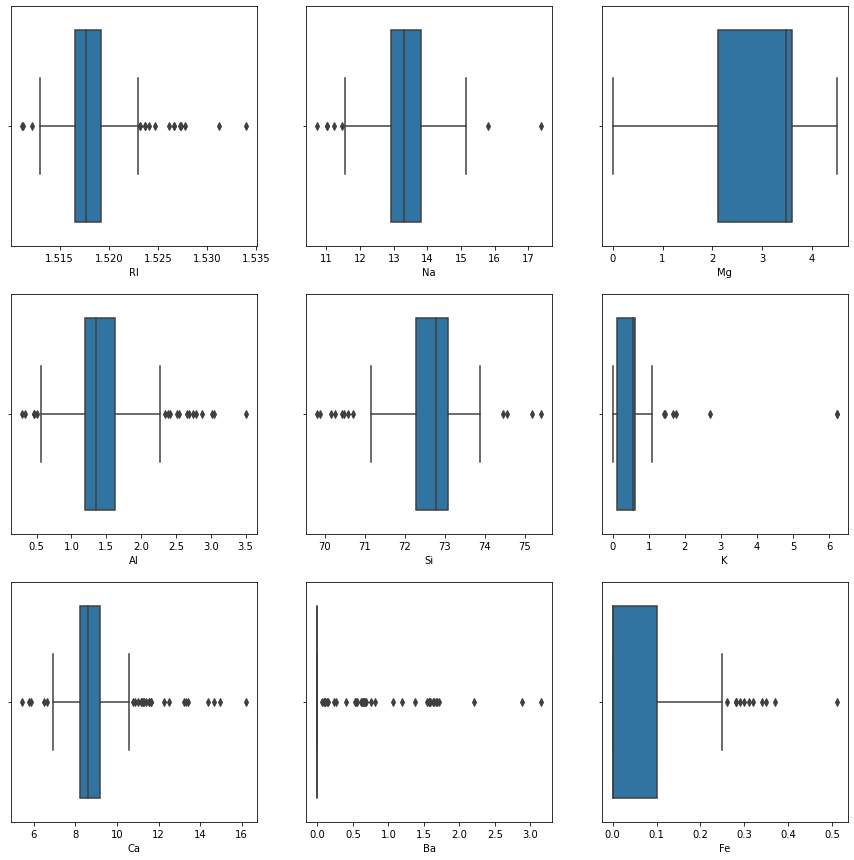

In [50]:
f=df.columns[:-1]
plt.figure(figsize=(15,15))
for col in enumerate(f):
    plt.subplot(3,3,col[0] + 1)
    sns.boxplot(data=df, x=col[1])

In [51]:
f

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [53]:
for i in f:
  print(i)

RI
Na
Mg
Al
Si
K
Ca
Ba
Fe


In [55]:
for i in f:
    q1 = df[i].quantile(0.01)
    q3 = df[i].quantile(0.99)
    df[i][df[i] < q1] = q1
    df[i][df[i] > q3] = q3
   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


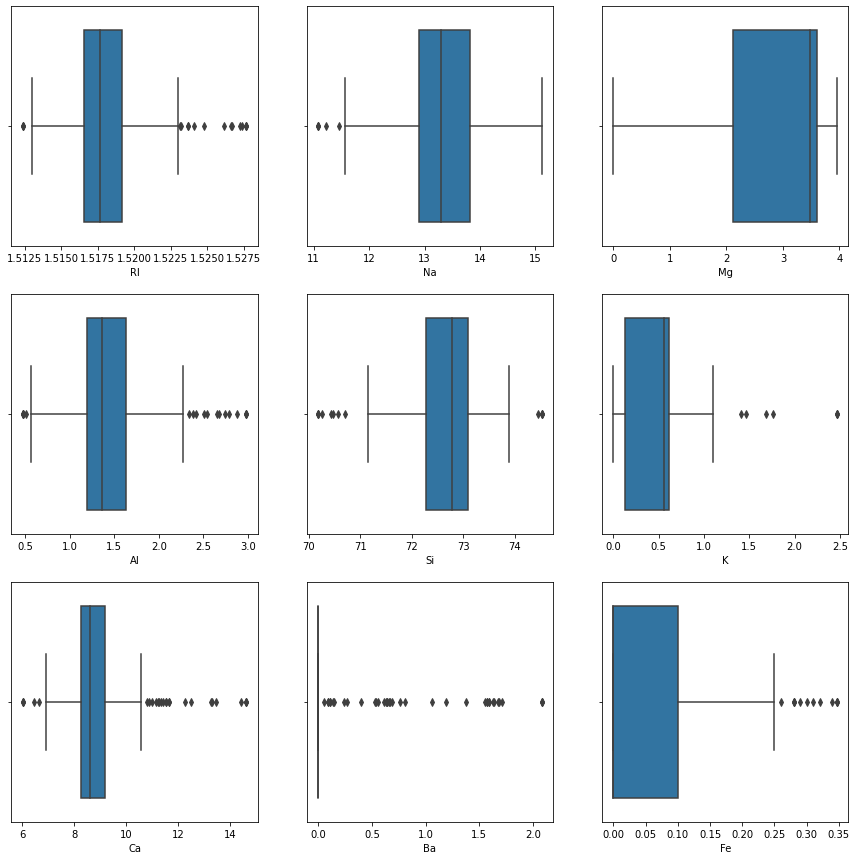

In [56]:
plt.figure(figsize=(15,15))
for col in enumerate(f):
    plt.subplot(3,3,col[0] + 1)
    sns.boxplot(data=df, x=col[1])

Very important to keep all the columns intact in the same unit/scale because distance calulation can
get influenced because of different units for various columns and wihth in columns

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
ss=StandardScaler()

In [60]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Id
0,1.52101,13.64,3.960276,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.600000,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.550000,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.690000,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.620000,1.24,73.08,0.55,8.07,0.0,0.0,104


In [61]:
x=df.drop('Id',axis=1)
df2=ss.fit_transform(x)

In [64]:
df2=pd.DataFrame(df2)

In [65]:
df2.head()

,0,1,2,3,4,5,6,7,8
0,0.951928,0.320393,0.890062,-0.708487,-1.172062,-1.038913,-0.147804,-0.368632,-0.597886
1,-0.255985,0.648789,0.639218,-0.172288,0.112398,0.049093,-0.820575,-0.368632,-0.597886
2,-0.764019,0.175899,0.604405,0.198926,0.463935,-0.184051,-0.857139,-0.368632,-0.597886
3,-0.238222,-0.244448,0.701881,-0.316649,-0.049849,0.282237,-0.535379,-0.368632,-0.597886
4,-0.323486,-0.165633,0.653143,-0.419764,0.585620,0.230427,-0.645070,-0.368632,-0.597886


In [67]:
df2.columns=df.columns[:-1]

In [68]:
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.951928,0.320393,0.890062,-0.708487,-1.172062,-1.038913,-0.147804,-0.368632,-0.597886
1,-0.255985,0.648789,0.639218,-0.172288,0.112398,0.049093,-0.820575,-0.368632,-0.597886
2,-0.764019,0.175899,0.604405,0.198926,0.463935,-0.184051,-0.857139,-0.368632,-0.597886
3,-0.238222,-0.244448,0.701881,-0.316649,-0.049849,0.282237,-0.535379,-0.368632,-0.597886
4,-0.323486,-0.165633,0.653143,-0.419764,0.585620,0.230427,-0.645070,-0.368632,-0.597886




```
`# This is formatted as code`
```

Steps For Clustering :
*Preprocessing
1.Outlier Treatment
2.Scaling :

*Check for Cluster Tendency: 
Here we will check if the data which we are using for clustering is actually having some clusters or not?
Hopkins Score

*Find the value of K

Business Logic
Silhouette
Elbow/SSD

*Run Final K-Means Algo
Use the value of K that was found out in the last step

*Cluster Profiling
Trying to make sense out of the cluster formed.
Finding the overall profile/property of the cluster formed

In [69]:
## Check the HOPKINS
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [70]:
hopkins(df2)

0.8685888825212579

In [76]:
# Let's run K-Means with different value of  K to check SILHOUETTE SCORE

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sil=[]
for k in range(2,11):
  km=KMeans(n_clusters=k,random_state=0).fit(df2)
  sil.append([k,silhouette_score(df2,km.labels_)])


In [77]:
sil

[[2, 0.4062888506197596],
 [3, 0.36393778383660574],
 [4, 0.3907428630126286],
 [5, 0.35950035722791923],
 [6, 0.33138096898198977],
 [7, 0.34348654108747945],
 [8, 0.35194669559642516],
 [9, 0.34629160090605515],
 [10, 0.35362268203309816]]

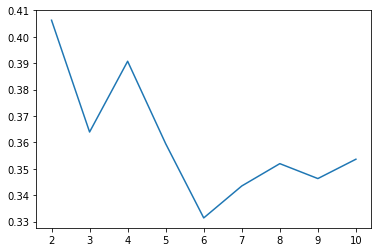

In [80]:
sil1=pd.DataFrame(sil)
plt.plot(sil1[0],sil1[1])
plt.show()

In [81]:
km.labels_

array([9, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 9, 9, 1, 4, 9,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 9, 1, 9, 9, 1, 1, 1, 9,
       4, 1, 4, 9, 9, 1, 9, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 9, 9, 9, 9, 9,
       4, 4, 4, 9, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 1, 4, 9, 9, 2, 2, 2, 0, 0,
       5, 5, 5, 4, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 4, 4, 0, 0, 2,
       1, 4, 1, 4, 4, 1, 1, 1, 1, 4, 4, 1, 4, 4, 1, 1, 1, 1, 4, 9, 1, 1,
       1, 1, 1, 9, 1, 1, 1, 4, 4, 6, 1, 5, 5, 0, 0, 0, 0, 8, 8, 0, 4, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 6, 6, 9, 9, 9, 3, 3, 3, 7, 7, 3, 3, 3,
       3, 3, 3, 1, 3, 7, 3, 7, 7, 6, 3, 3, 7, 7, 7, 7], dtype=int32)

RULE FOR CHOOSING VALUE OF K
Never go with k=2 as the option because it means you divide the complete data into two halfs and it's not useful for any business case.
If you have option to choose between two values of K, always go with a lesser value.
Since we will be taking business decisions based on the cluster result, it's awlays a good idea to go with a lower value of K so that it's easy to take and implement business decisions.
Silhouette: That value of k for which the score is maximum
Elbow, you look at the elbow of the curve

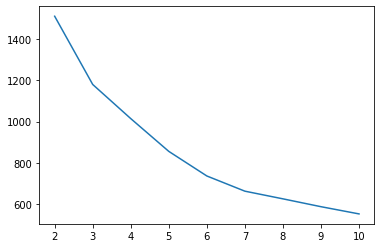

In [86]:
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df2)
    ssd.append([k, kmean.inertia_])
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.show()

In [87]:
## K=3 Final KMeans Analysis
km=KMeans(n_clusters=3,random_state=0)
km.fit(df2)

KMeans(n_clusters=3, random_state=0)

In [89]:
km.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [90]:
df['label'] = km.labels_

In [91]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Id,label
0,1.52101,13.64,3.960276,1.10,71.78,0.06,8.75,0.00,0.0,100,1
1,1.51761,13.89,3.600000,1.36,72.73,0.48,7.83,0.00,0.0,101,0
2,1.51618,13.53,3.550000,1.54,72.99,0.39,7.78,0.00,0.0,102,0
3,1.51766,13.21,3.690000,1.29,72.61,0.57,8.22,0.00,0.0,103,0
4,1.51742,13.27,3.620000,1.24,73.08,0.55,8.07,0.00,0.0,104,0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.000000,2.88,72.61,0.08,9.18,1.06,0.0,309,2
210,1.51685,14.92,0.000000,1.99,73.06,0.00,8.40,1.59,0.0,310,2
211,1.52065,14.36,0.000000,2.02,73.42,0.00,8.44,1.64,0.0,311,2
212,1.51651,14.38,0.000000,1.94,73.61,0.00,8.48,1.57,0.0,312,2


In [94]:
df['label'].value_counts()

0    133
1     52
2     29
Name: label, dtype: int64

In [ ]:
`